# Test the FAST API

`docker build -t <IMAGE_NAME> .`

`docker run --rm -it -e sh_client_id=<CLIENT ID> -e sh_client_secret=<SECRET>  -e sh_instance_id=<INSTANCE_ID> -p 10004:10003 <IMAGE_NAME>:latest`

In [1]:
import requests

Test with images

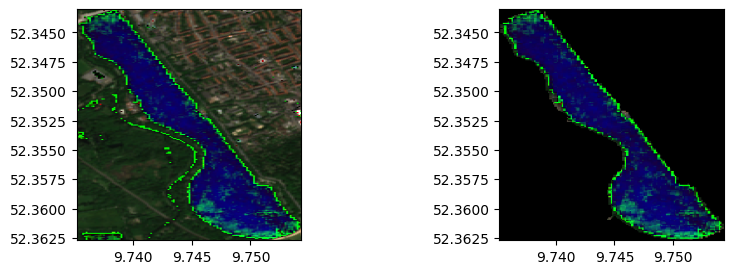

In [17]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

request_url = "http://0.0.0.0:10004/api/get_apa"
request_dict = {
  "day": "2024-05-13",
  "resolution_in_m": 10,
  "max_cloud_coverage": 0.5,
  "lake_query": "Maschsee, Hannover, Germany",
  "copernicus_data_service": "ALL-BANDS-TRUE-COLOR"
}
data = requests.post(request_url, json=request_dict)
if data.status_code == 200:
    images = data.json()

    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    for date, image in images.items():
        one_day = dict()
        one_day['raw_apa'] = np.array(image['raw_apa'])
        one_day['cropped_apa'] = np.array(image['cropped_apa'])
        one_day['gps'] = np.array(image['gps'])

        lon_min, lat_min = np.min(one_day['gps'], axis=0)
        lon_max, lat_max = np.max(one_day['gps'], axis=0)

        ax[0].imshow(
        one_day['raw_apa'],
        extent=[lon_min, lon_max, lat_max, lat_min]
        )

        ax[1].imshow(
            one_day['cropped_apa'],
            extent=[lon_min, lon_max, lat_max, lat_min]
        )
else:
    print(data.status_code)
    print(data.text)

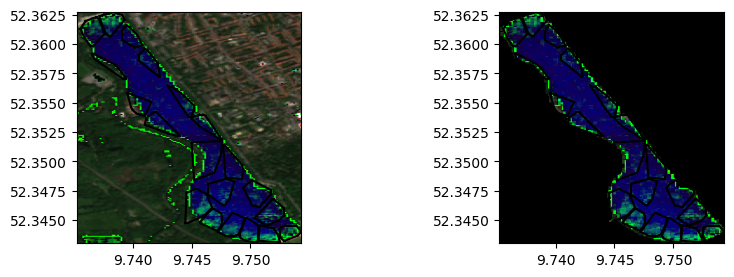

In [35]:
request_url = "http://0.0.0.0:10004/api/get_aois"
request_dict = {
  "day": "2024-05-13",
  "resolution_in_m": 10,
  "max_cloud_coverage": 0.5,
  "lake_query": "Maschsee, Hannover, Germany",
  "copernicus_data_service": "ALL-BANDS-TRUE-COLOR"
}

def _plot_aois(aois, ax):
    for i, c in enumerate(aois):
        hull = ConvexHull(c)
        c = np.array(c)
        for simplex in hull.simplices:
            ax.plot(c[simplex, 0], c[simplex, 1], linestyle='-', color='black')

data = requests.post(request_url, json=request_dict)
if data.status_code == 200:
    images = data.json()

    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    for date, image in images.items():
        one_day = dict()
        one_day['raw_apa'] = np.array(image['raw_apa'])
        one_day['cropped_apa'] = np.array(image['cropped_apa'])
        one_day['gps'] = np.array(image['gps'])
        one_day['areas_of_interest'] = image['areas_of_interest']

        lon_min, lat_min = np.min(one_day['gps'], axis=0)
        lon_max, lat_max = np.max(one_day['gps'], axis=0)

        ax[0].imshow(
            one_day['raw_apa'],
            extent=[lon_min, lon_max, lat_min, lat_max]
        )
        _plot_aois(one_day['areas_of_interest'], ax[0])

        ax[1].imshow(
            one_day['cropped_apa'],
            extent=[lon_min, lon_max, lat_min, lat_max]
        )
        _plot_aois(one_day['areas_of_interest'], ax[1])

else:
    print(data.status_code)
    print(data.text)